In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from data import data_preprocess
from evaluation import metrics
from model import end2end, end2end_crps

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('concrete')

In [3]:
y_mean = torch.mean(y_train)
y_sd = torch.std(y_train)

y_train = (y_train - y_mean) / y_sd

In [4]:
end2end_model = end2end.train_model(x_train, y_train, n_epoch = 500, hidden_layers = [50, 50], learning_rate = 0.001)

initial loss:  1.0193557739257812
251 0.09843200000000002 tensor(-1.6514, grad_fn=<MeanBackward0>) tensor(0.0479, grad_fn=<SumBackward1>)
252 0.07725155555555549 tensor(-1.6179, grad_fn=<MeanBackward0>) tensor(0.0462, grad_fn=<SumBackward1>)
253 0.1498613333333334 tensor(-1.5950, grad_fn=<MeanBackward0>) tensor(0.0527, grad_fn=<SumBackward1>)
254 0.11083733333333332 tensor(-1.5642, grad_fn=<MeanBackward0>) tensor(0.0495, grad_fn=<SumBackward1>)
255 0.15954488888888896 tensor(-1.5888, grad_fn=<MeanBackward0>) tensor(0.0533, grad_fn=<SumBackward1>)
256 0.08543288888888885 tensor(-1.6082, grad_fn=<MeanBackward0>) tensor(0.0469, grad_fn=<SumBackward1>)
257 0.10994311111111116 tensor(-1.6484, grad_fn=<MeanBackward0>) tensor(0.0489, grad_fn=<SumBackward1>)
258 0.055573333333333315 tensor(-1.6606, grad_fn=<MeanBackward0>) tensor(0.0441, grad_fn=<SumBackward1>)
259 0.09347733333333337 tensor(-1.6738, grad_fn=<MeanBackward0>) tensor(0.0474, grad_fn=<SumBackward1>)
260 0.056455111111111074 tenso

407 0.11223822222222227 tensor(-1.8903, grad_fn=<MeanBackward0>) tensor(0.0490, grad_fn=<SumBackward1>)
408 0.0729102222222222 tensor(-1.8866, grad_fn=<MeanBackward0>) tensor(0.0460, grad_fn=<SumBackward1>)
409 0.11814755555555558 tensor(-1.8880, grad_fn=<MeanBackward0>) tensor(0.0495, grad_fn=<SumBackward1>)
410 0.07591999999999997 tensor(-1.8862, grad_fn=<MeanBackward0>) tensor(0.0462, grad_fn=<SumBackward1>)
411 0.11779022222222223 tensor(-1.8914, grad_fn=<MeanBackward0>) tensor(0.0495, grad_fn=<SumBackward1>)
412 0.07513244444444439 tensor(-1.8901, grad_fn=<MeanBackward0>) tensor(0.0462, grad_fn=<SumBackward1>)
413 0.11763377777777781 tensor(-1.8943, grad_fn=<MeanBackward0>) tensor(0.0495, grad_fn=<SumBackward1>)
414 0.07542577777777772 tensor(-1.8937, grad_fn=<MeanBackward0>) tensor(0.0462, grad_fn=<SumBackward1>)
415 0.11720355555555559 tensor(-1.8978, grad_fn=<MeanBackward0>) tensor(0.0494, grad_fn=<SumBackward1>)
416 0.07378133333333335 tensor(-1.8964, grad_fn=<MeanBackward0>) 

Deep ensemble test MAPE:  0.17782044
Deep ensemble test RMSE:  6.3166656


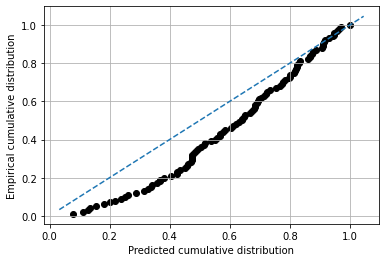

Deep ensemble test calibration error when step size is 0.001:  15.039490816326527
Deep ensemble test calibration error when step size is 0.01:  1.5056352040816323
Deep ensemble test calibration error when step size is 0.1:  0.14414540816326524


In [5]:
mean_pred, var_pred = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy() * y_sd.detach().numpy()+ y_mean.detach().numpy()
var_pred = var_pred.detach().numpy() * torch.pow(y_sd, 2).detach().numpy()

print('Deep ensemble test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('Deep ensemble test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('Deep ensemble test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('Deep ensemble test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('Deep ensemble test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

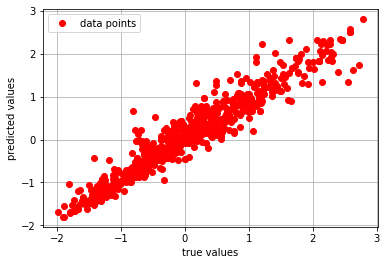

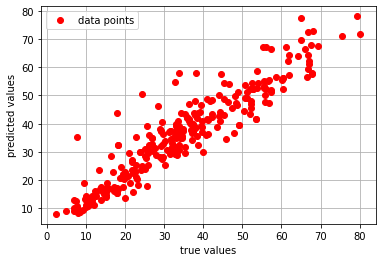

In [6]:
plt.plot(y_train.detach().numpy(), end2end_model(x_train)[0].detach().numpy().squeeze(1), 'or', label='data points')
plt.grid()
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
plt.show()

plt.plot(y_test.detach().numpy(), mean_pred.squeeze(1), 'or', label='data points')
plt.grid()
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
plt.show()

In [4]:
end2end_model = end2end_crps.train_model(x_train, y_train, n_epoch = 500, hidden_layers = [50, 50], learning_rate = 0.001)

initial loss:  1.145910620689392
251 0.06045333333333331 tensor(-1.6572, grad_fn=<MeanBackward0>) tensor(0.1616, grad_fn=<MeanBackward0>)
252 0.09701866666666673 tensor(-1.6379, grad_fn=<MeanBackward0>) tensor(0.1639, grad_fn=<MeanBackward0>)
253 0.09025777777777773 tensor(-1.6163, grad_fn=<MeanBackward0>) tensor(0.1639, grad_fn=<MeanBackward0>)
254 0.13200000000000003 tensor(-1.6011, grad_fn=<MeanBackward0>) tensor(0.1663, grad_fn=<MeanBackward0>)
255 0.09301511111111108 tensor(-1.6155, grad_fn=<MeanBackward0>) tensor(0.1640, grad_fn=<MeanBackward0>)
256 0.1065173333333334 tensor(-1.6357, grad_fn=<MeanBackward0>) tensor(0.1641, grad_fn=<MeanBackward0>)
257 0.06579733333333329 tensor(-1.6573, grad_fn=<MeanBackward0>) tensor(0.1616, grad_fn=<MeanBackward0>)
258 0.08689244444444448 tensor(-1.6641, grad_fn=<MeanBackward0>) tensor(0.1622, grad_fn=<MeanBackward0>)
259 0.06272177777777774 tensor(-1.6678, grad_fn=<MeanBackward0>) tensor(0.1609, grad_fn=<MeanBackward0>)
260 0.0949066666666667 

328 0.10033244444444447 tensor(-1.7954, grad_fn=<MeanBackward0>) tensor(0.1533, grad_fn=<MeanBackward0>)
329 0.06621333333333332 tensor(-1.7957, grad_fn=<MeanBackward0>) tensor(0.1521, grad_fn=<MeanBackward0>)
330 0.10201600000000004 tensor(-1.7929, grad_fn=<MeanBackward0>) tensor(0.1534, grad_fn=<MeanBackward0>)
331 0.06486399999999998 tensor(-1.7984, grad_fn=<MeanBackward0>) tensor(0.1519, grad_fn=<MeanBackward0>)
332 0.09556444444444448 tensor(-1.8033, grad_fn=<MeanBackward0>) tensor(0.1528, grad_fn=<MeanBackward0>)
333 0.06052622222222219 tensor(-1.8094, grad_fn=<MeanBackward0>) tensor(0.1513, grad_fn=<MeanBackward0>)
334 0.09690133333333337 tensor(-1.8100, grad_fn=<MeanBackward0>) tensor(0.1525, grad_fn=<MeanBackward0>)
335 0.06332622222222221 tensor(-1.8149, grad_fn=<MeanBackward0>) tensor(0.1511, grad_fn=<MeanBackward0>)
336 0.09975466666666673 tensor(-1.8122, grad_fn=<MeanBackward0>) tensor(0.1523, grad_fn=<MeanBackward0>)
337 0.06682488888888886 tensor(-1.8135, grad_fn=<MeanBa

406 0.1129475555555556 tensor(-1.9157, grad_fn=<MeanBackward0>) tensor(0.1461, grad_fn=<MeanBackward0>)
407 0.0725564444444444 tensor(-1.9153, grad_fn=<MeanBackward0>) tensor(0.1447, grad_fn=<MeanBackward0>)
408 0.11255822222222227 tensor(-1.9144, grad_fn=<MeanBackward0>) tensor(0.1462, grad_fn=<MeanBackward0>)
409 0.07257244444444443 tensor(-1.9173, grad_fn=<MeanBackward0>) tensor(0.1445, grad_fn=<MeanBackward0>)
410 0.10621155555555559 tensor(-1.9256, grad_fn=<MeanBackward0>) tensor(0.1455, grad_fn=<MeanBackward0>)
411 0.06613511111111109 tensor(-1.9311, grad_fn=<MeanBackward0>) tensor(0.1439, grad_fn=<MeanBackward0>)
412 0.10274311111111117 tensor(-1.9343, grad_fn=<MeanBackward0>) tensor(0.1451, grad_fn=<MeanBackward0>)
413 0.06741688888888886 tensor(-1.9375, grad_fn=<MeanBackward0>) tensor(0.1436, grad_fn=<MeanBackward0>)
414 0.10985066666666674 tensor(-1.9314, grad_fn=<MeanBackward0>) tensor(0.1453, grad_fn=<MeanBackward0>)
415 0.07486577777777775 tensor(-1.9288, grad_fn=<MeanBack

484 0.11540266666666668 tensor(-2.0236, grad_fn=<MeanBackward0>) tensor(0.1402, grad_fn=<MeanBackward0>)
485 0.07392888888888885 tensor(-2.0201, grad_fn=<MeanBackward0>) tensor(0.1388, grad_fn=<MeanBackward0>)
486 0.12259022222222227 tensor(-2.0212, grad_fn=<MeanBackward0>) tensor(0.1403, grad_fn=<MeanBackward0>)
487 0.08144177777777772 tensor(-2.0123, grad_fn=<MeanBackward0>) tensor(0.1392, grad_fn=<MeanBackward0>)
488 0.12772088888888894 tensor(-2.0145, grad_fn=<MeanBackward0>) tensor(0.1407, grad_fn=<MeanBackward0>)
489 0.0857191111111111 tensor(-2.0094, grad_fn=<MeanBackward0>) tensor(0.1394, grad_fn=<MeanBackward0>)
490 0.12558222222222223 tensor(-2.0186, grad_fn=<MeanBackward0>) tensor(0.1405, grad_fn=<MeanBackward0>)
491 0.07865422222222215 tensor(-2.0240, grad_fn=<MeanBackward0>) tensor(0.1386, grad_fn=<MeanBackward0>)
492 0.12195911111111116 tensor(-2.0260, grad_fn=<MeanBackward0>) tensor(0.1400, grad_fn=<MeanBackward0>)
493 0.07284622222222219 tensor(-2.0265, grad_fn=<MeanBac

Deep ensemble test MAPE:  0.15465535
Deep ensemble test RMSE:  5.9844646


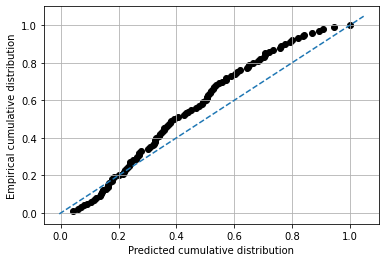

Deep ensemble test calibration error when step size is 0.001:  8.473603061224491
Deep ensemble test calibration error when step size is 0.01:  0.8443852040816329
Deep ensemble test calibration error when step size is 0.1:  0.08315051020408168


In [5]:
mean_pred, var_pred = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy() * y_sd.detach().numpy()+ y_mean.detach().numpy()
var_pred = var_pred.detach().numpy() * torch.pow(y_sd, 2).detach().numpy()

print('Deep ensemble test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('Deep ensemble test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('Deep ensemble test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('Deep ensemble test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('Deep ensemble test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))